## Holiday Package Prediction


### 1.Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')


In [51]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data Cleaning 

Handling Missing values

1.Handling Missing values

2.Handling Duplicates

3.Check data types

4.Understand the dataset

In [53]:
# check  all the missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [54]:
# check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [55]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [56]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [57]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [58]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [59]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [60]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [61]:
## check for missing values
## features with nan value
features_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for features in features_na:
    print(features,np.round(df[features].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [62]:
# statistics on numerical columns
df[features_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null values

##### 1.Impute Median value in age column
##### 2.Impute mode for Type of contact
##### 3.Impute mode for NumberofFollowup as it is Discrete
##### 4.Impute median for duration of pitch
##### 5.Impute Median for Monthlyincome
##### 6.Impute mode for NumberOfChildrenVisiting
##### 7.Impute Median for Numberoftrips 
##### 8.Impute mode for PreferredPropertyStar

In [63]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [64]:
#age
df['Age'].fillna(df['Age'].median(),inplace=True)

#Typeofontact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)

#Durationofpitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

#Numberoffollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)

#prefferedpropertystar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)

#NumberofTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

#monthlyincome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)




In [65]:
df.head()
df.isnull().sum()


CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [66]:
df.drop(columns='CustomerID',inplace=True)

In [67]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [68]:
# create one column for two features
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True)

In [69]:
#numerical features
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f'Number of numerical features : {len(numeric_features)}')

Number of numerical features : 12


In [70]:
#categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
print(f'Number of categorical features : {len(categorical_features)}')

Number of categorical features : 6


In [71]:
# Discrete features
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
print(f'Number of discrete features : {len(discrete_features)}')

Number of discrete features : 9


In [72]:
#continuous features
continuous_features = [feature for feature in numeric_features if feature not in discrete_features]
print(f'Number of continuous features : {len(continuous_features)}')

Number of continuous features : 3


## Train Test Split and Model training

In [73]:
from sklearn.model_selection import train_test_split
x=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [74]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [75]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((3910, 17), (978, 17))

In [77]:
# creating column transformer
cat_features = x.select_dtypes(include="object").columns
num_features = x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('standardscaler', numeric_transformer, num_features)
    ]
)

In [78]:
print(preprocessor)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('standardscaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])


In [79]:
#applying transformation on training dataset
x_train=preprocessor.fit_transform(x_train)


In [80]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [81]:
#applying transformation on test dataset
x_test=preprocessor.transform(x_test)

### Model training with random forest classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [105]:
models={
    'Random Forest':RandomForestClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'Adaboost classifier':AdaBoostClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'xgboost':XGBClassifier()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    #making prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision_score = precision_score(y_train, y_train_pred)
    model_train_recall_score = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision_score = precision_score(y_test, y_test_pred)
    model_test_recall_score = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    print('\n',list(models.keys())[i])

    print("\nPerformance of model for training dataset")
    
    print('- F1 score: {:.3f}'.format(model_train_f1))
    print('- precision score: {:.3f}'.format(model_train_precision_score))
    print('- recall score: {:.3f}'.format(model_train_recall_score))
    print('- roc auc score: {:.3f}'.format(model_train_roc_auc_score))
    print('- accuracy: {:.3f}'.format(model_train_accuracy))

    print('\n==================================')

    print("Performance of model for test dataset")
    print('- F1 score: {:.3f}'.format(model_test_f1))
    print('- precision score: {:.3f}'.format(model_test_precision_score))
    print('- recall score: {:.3f}'.format(model_test_recall_score))
    print('- roc auc score: {:.3f}'.format(model_test_roc_auc_score))
    print('- accuracy: {:.3f}'.format(model_test_accuracy))

    print('\n==================================')




 Random Forest

Performance of model for training dataset
- F1 score: 1.000
- precision score: 1.000
- recall score: 1.000
- roc auc score: 1.000
- accuracy: 1.000

Performance of model for test dataset
- F1 score: 0.919
- precision score: 0.968
- recall score: 0.639
- roc auc score: 0.817
- accuracy: 0.925


 Decision tree

Performance of model for training dataset
- F1 score: 1.000
- precision score: 1.000
- recall score: 1.000
- roc auc score: 1.000
- accuracy: 1.000

Performance of model for test dataset
- F1 score: 0.919
- precision score: 0.819
- recall score: 0.759
- roc auc score: 0.859
- accuracy: 0.920


 Adaboost classifier

Performance of model for training dataset
- F1 score: 0.836
- precision score: 0.731
- recall score: 0.365
- roc auc score: 0.667
- accuracy: 0.857

Performance of model for test dataset
- F1 score: 0.811
- precision score: 0.663
- recall score: 0.319
- roc auc score: 0.640
- accuracy: 0.835


 Gradient Boost

Performance of model for training dataset
-

In [106]:
# Hyperparameter Training
rf_params = {'max_depth':[5,8,15,None,10],
             'max_features':[5,7,'auto',8],
             'min_samples_split':[2,9,16,22],
             'n_estimators':[100,200,500,800,1000]}

xgboost_params={
            'n_estimators':[50,100,200,300],
            'learning_rate':[0.1,0.01],
            'max_depth':[5,8,12,20,30],
            'colsample_bytree':[0.5,0.8,1,0.3,0.4]
                }

gradient_params={'loss':['deviance','exponential','log_loss'],
                 'criterion':['squared_error','mse','friedman_mse'],
                 'min_samples_split':[2,10,15,20],
                 'n_estimators':[100,200,500,1000],
                 'max_depth':[None,5,8,10,15]
                 }

In [107]:
randomcv_models = [
                    ('RF',RandomForestClassifier(), rf_params),
                    ('XG',XGBClassifier(), xgboost_params),
                    ('GB',GradientBoostingClassifier(), gradient_params)
                    ]

In [108]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'============={model_name} Best Params ==============')
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
=============RF Best Params ==============
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
=============XG Best Params ==============
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
=============GB Best Params ==============
{'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 15, 'loss': 'log_loss', 'criterion': 'friedman_mse'}


In [109]:
models_after_hyperparametertuning={
    'random forest':RandomForestClassifier(n_estimators=800,min_samples_split=2,max_features=5,max_depth=None),
    'GradientBoosting':GradientBoostingClassifier(n_estimators=500,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse'),
    'XGboost':XGBClassifier(n_estimators=300, max_depth=8, learning_rate=0.1, colsample_bytree=0.8)
}


for i in range(len(list(models_after_hyperparametertuning))):
    model=list(models_after_hyperparametertuning.values())[i]
    model.fit(x_train,y_train)

    #making prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision_score = precision_score(y_train, y_train_pred)
    model_train_recall_score = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision_score = precision_score(y_test, y_test_pred)
    model_test_recall_score = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    print('\n',list(models_after_hyperparametertuning.keys())[i])

    print("\nPerformance of model for training dataset")
    print('- F1 score: {:.3f}'.format(model_train_f1))
    print('- precision score: {:.3f}'.format(model_train_precision_score))
    print('- recall score: {:.3f}'.format(model_train_recall_score))
    print('- roc auc score: {:.3f}'.format(model_train_roc_auc_score))
    print('- accuracy: {:.3f}'.format(model_train_accuracy))

    print('\n==================================')
    
    print("Performance of model for test dataset")
    print('- F1 score: {:.3f}'.format(model_test_f1))
    print('- precision score: {:.3f}'.format(model_test_precision_score))
    print('- recall score: {:.3f}'.format(model_test_recall_score))
    print('- roc auc score: {:.3f}'.format(model_test_roc_auc_score))
    print('- accuracy: {:.3f}'.format(model_test_accuracy))

    print('\n==================================')


 random forest

Performance of model for training dataset
- F1 score: 1.000
- precision score: 1.000
- recall score: 1.000
- roc auc score: 1.000
- accuracy: 1.000

Performance of model for test dataset
- F1 score: 0.926
- precision score: 0.977
- recall score: 0.665
- roc auc score: 0.831
- accuracy: 0.931


 GradientBoosting

Performance of model for training dataset
- F1 score: 1.000
- precision score: 1.000
- recall score: 1.000
- roc auc score: 1.000
- accuracy: 1.000

Performance of model for test dataset
- F1 score: 0.960
- precision score: 0.969
- recall score: 0.827
- roc auc score: 0.910
- accuracy: 0.961


 XGboost

Performance of model for training dataset
- F1 score: 1.000
- precision score: 1.000
- recall score: 1.000
- roc auc score: 1.000
- accuracy: 1.000

Performance of model for test dataset
- F1 score: 0.946
- precision score: 0.961
- recall score: 0.764
- roc auc score: 0.878
- accuracy: 0.948



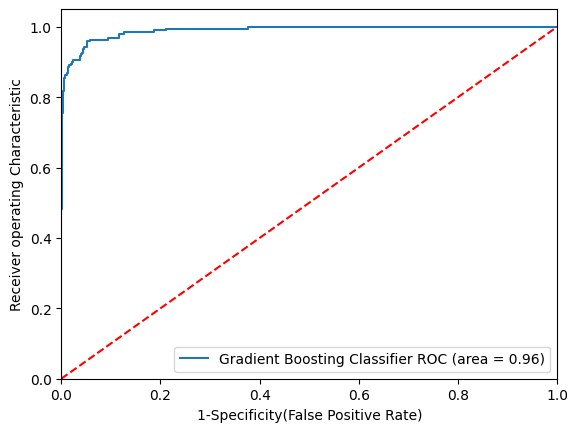

In [103]:
# Plot ROC AUC curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

#add models to the list that you want to view on the ROC plot
auc_model=[
    {
        'label':'Gradient Boosting Classifier',
        'model' : GradientBoostingClassifier(n_estimators=500,min_samples_split=15,max_depth=15,loss='exponential',criterion='friedman_mse'),
        'auc':0.961
    }
]

# create loop through all model
for auc in auc_model:
    model = auc['model']
    model.fit(x_train, y_train)

    fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])

    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (auc['label'], auc['auc']))

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Receiver operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()